In [1]:
# Importando bibliotecas externas
# matplotlib - biblioteca para criação de gráficos
from matplotlib import pyplot as plt
# pandas - biblioteca para manipulação de dados
import pandas as pd
# numpy - biblioteca numérica em Python
import numpy as np
# scipy - biblioteca direcionada para estudos científicos
import scipy.optimize as optimize

# batchpy - biblioteca com os modelos cinéticos de adsorção
from batchpy import batch as bh

In [2]:
ctab_data = pd.read_csv('./ctab_removal/ctab_removal.csv', sep=';')
exp_data = {
'30':ctab_data.iloc[range(8)],
'60':ctab_data.iloc[range(8,16)],
'90':ctab_data.iloc[range(16,24)],
'120':ctab_data.iloc[range(24,32)],
'150':ctab_data.iloc[range(32,40)],
'180':ctab_data.iloc[range(40,48)],
'240':ctab_data.iloc[range(48,56)],
'300':ctab_data.iloc[range(56,64)],
}

In [3]:
def cb(co, qe, v, w):
    #if  co - qe * w/v < 0:
        #return 0
    #else:
    return co - qe * w/v
eq_data = {
'qe':[],
'ce':[]
}
for key in exp_data.keys(): 
    exp_data[key] = exp_data[key].reset_index(drop=True)
    exp_data[key]['cb'] = cb(int(key), exp_data[key]['q'], 0.1, 0.1)
    exp_data[key]['v'] = exp_data[key]['cb']/int(key)

    eq_data['qe'].append(exp_data[key]['q'][7])
    eq_data['ce'].append(cb(int(key), exp_data[key]['q'][7], 0.1, 0.1))

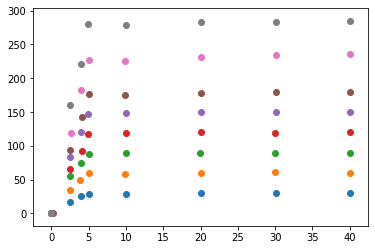

In [5]:
for values in exp_data.values():
    plt.scatter(values['t'],values['q'])

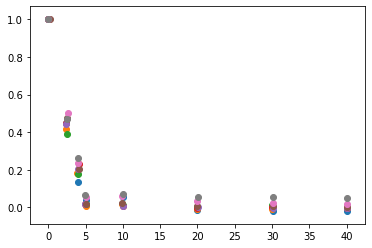

In [6]:
for key in exp_data.keys():
    plt.scatter(exp_data[key]['t'],exp_data[key]['v'])
plt.show()

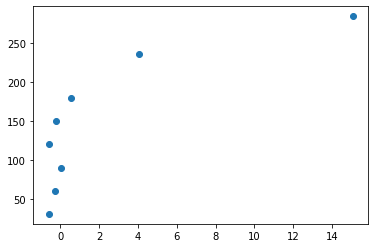

In [7]:
plt.scatter(eq_data['ce'], eq_data['qe'])
plt.show()

In [13]:
x_exp = pd.Series()
y_exp = pd.Series()

for key in exp_data.keys():
    x_exp = x_exp.append(exp_data[key]['t'])
    y_exp = y_exp.append(exp_data[key]['v'])

def func(x, a, bi, D_R2):
    v=np.zeros(x.shape)
    eps = 1e-6
    s=2
    t = x * D_R2
    for i in range(len(t)):
        v[i] = bh.finite_batch_bulk(t[i],bi,a,s,eps)
    return v


guess = [1, 1, 0.001]
constants, _ = optimize.curve_fit(func, x_exp.tolist(), y_exp.tolist(), p0 = guess)
print(constants)
x_fit = np.linspace(0.0, 250 ,1000)
y_fit = func(x_fit, constants[0], constants[1], constants[2])
plt.scatter(x_exp, y_exp)

plt.plot(x_fit, y_fit ,'-r')

plt.scatter(x_exp, y_exp)